In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels
import numpy as np

In [17]:
df_counts = pd.read_csv('counts_by_country.csv')
df_tone = pd.read_csv('imm_speech_ids_with_tone_simple.tsv')
df_pop = pd.read_csv('foreign_born_1850-2019.csv')
countries = set([x.split()[-1] for x in df_counts.columns if '_imm_speeches ' in x])

/Users/juliame/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df_counts = df_counts.drop(columns=['Unnamed: 0'])

In [19]:
for country in countries:
    df_counts[f'anti_percent {country}'] = df_counts[f'anti_imm_speeches {country}'] / df_counts[f'total_imm_speeches {country}']
    df_counts[f'pro_percent {country}'] = df_counts[f'pro_imm_speeches {country}'] / df_counts[f'total_imm_speeches {country}']
    df_counts[f'neutral_percent {country}'] = df_counts[f'neutral_imm_speeches {country}'] / df_counts[f'total_imm_speeches {country}']


In [20]:
df_counts

,congress,year,total_imm_speeches,pro_imm_speeches,neutral_imm_speeches,anti_imm_speeches,total_imm_speeches Mexico,pro_imm_speeches Mexico,neutral_imm_speeches Mexico,anti_imm_speeches Mexico,...,neutral_percent Poland,anti_percent Ireland,pro_percent Ireland,neutral_percent Ireland,anti_percent Haiti,pro_percent Haiti,neutral_percent Haiti,anti_percent Italy,pro_percent Italy,neutral_percent Italy
0,46,1880,379,36,234,96,1,0,1,0,...,NaN,0.500000,0.166667,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
1,47,1882,1218,120,574,486,14,3,2,9,...,NaN,0.528302,0.169811,0.301887,NaN,NaN,NaN,0.625000,0.125000,0.250000
2,48,1884,607,38,223,327,9,1,4,4,...,0.000000,0.709677,0.225806,0.064516,NaN,NaN,NaN,0.892857,0.035714,0.071429
3,49,1886,485,61,194,218,10,1,1,8,...,0.250000,0.470588,0.235294,0.294118,NaN,NaN,NaN,0.555556,0.111111,0.333333
4,50,1888,1325,132,593,549,26,6,5,15,...,0.400000,0.571429,0.122449,0.306122,NaN,NaN,NaN,0.615385,0.000000,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,112,2012,2323,1262,597,427,169,70,32,67,...,0.022222,0.000000,0.851064,0.148936,0.000000,0.692308,0.307692,0.033898,0.949153,0.016949
67,113,2014,4065,1489,1615,877,357,149,75,133,...,0.176471,0.108108,0.837838,0.054054,0.064516,0.774194,0.161290,0.084746,0.847458,0.067797
68,114,2016,3137,1266,1124,705,193,120,32,41,...,0.080000,0.019608,0.843137,0.137255,0.086957,0.739130,0.173913,0.079365,0.841270,0.079365
69,115,2018,3976,2120,1243,580,402,224,79,99,...,0.166667,0.013889,0.805556,0.180556,0.095238,0.809524,0.095238,0.000000,0.915493,0.084507


In [19]:
count_dict = df_counts.set_index(['congress','year']).to_dict()

In [20]:
binary_labels = []
for country in countries:
    pro_counts = count_dict[f'pro_imm_speeches {country}']
    anti_counts = count_dict[f'anti_imm_speeches {country}']
    neutral_counts = count_dict[f'neutral_imm_speeches {country}']
    for (congress,year) in pro_counts:
        for i in range(pro_counts[(congress,year)]):
            binary_labels.append((congress,year,country,1,0,0))
    for (congress,year) in anti_counts:
        for i in range(anti_counts[(congress,year)]):
            binary_labels.append((congress,year,country,0,0,1))
    for (congress,year) in neutral_counts:
        for i in range(neutral_counts[(congress,year)]):
            binary_labels.append((congress,year,country,0,1,0))


In [21]:
df = pd.DataFrame(binary_labels,columns=['congress','year','country','is_pro','is_neutral','is_anti'])

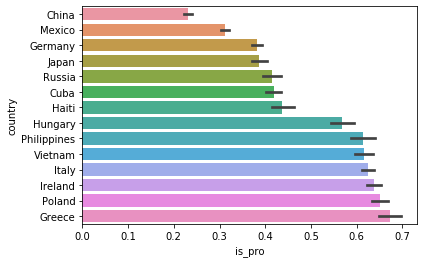

In [54]:
sns.barplot(y='country',x='is_pro',data=df,
           order = df.groupby(by='country').agg('mean').sort_values(by='is_pro').reset_index()['country']
)

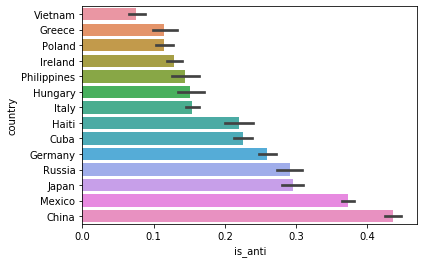

In [55]:
sns.barplot(y='country',x='is_anti',data=df,
           order = df.groupby(by='country').agg('mean').sort_values(by='is_anti').reset_index()['country']
)

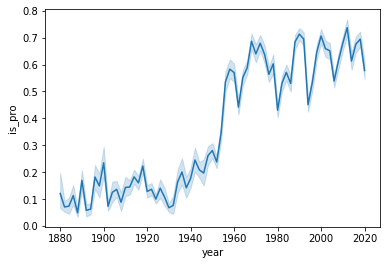

In [61]:
sns.lineplot(x='year',y='is_pro',data=df)

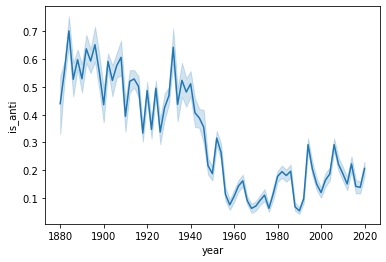

In [62]:
sns.lineplot(x='year',y='is_anti',data=df)

In [79]:
total_pop = df_pop[df_pop['Place']=='Total Population'].iloc[0].to_dict()

In [80]:
total_foreign = df_pop[df_pop['Place']=='Total Foreign Born'].iloc[0].to_dict()

In [82]:
total_by_country = {}
for country in countries:
    total_by_country[country] = df_pop[df_pop['Place']==country].iloc[0].to_dict()

In [109]:
pop_percents = []
for country in countries:
    for year_int in range(1850,2030,10):
        year = str(year_int)
        if year == '2020':
            year = '2019'
        frac_of_total = total_by_country[country][year] / total_pop[year]
        frac_of_foreign_born = total_by_country[country][year] / total_foreign[year]
        pop_percents.append((country,year_int,frac_of_total,frac_of_foreign_born))
   

In [111]:
df_pop_percents = pd.DataFrame(pop_percents,columns=['country','decade','frac_total_pop','frac_foreign_pop'])

In [120]:
df['decade'] = 10 * (df['year'] // 10)

In [22]:
df2 = df.merge(df_pop_percents,on=['country','decade'])

NameError: name 'df_pop_percents' is not defined

In [137]:
continents = {}
for c in ['Ireland','Germany','Hungary','Poland','Russia','Greece','Italy']:
    continents[c] = 'Europe'
for c in ['China','Japan','Philippines','Vietnam']:
    continents[c] = 'Asia'
for c in ['Cuba','Haiti','Mexico']:
    continents[c] = 'NorthAmerica'

In [138]:
df2['continent'] = df2['country'].apply(lambda x: continents[x])

In [140]:
df2.to_csv('datasheet.csv')

In [141]:
df2

,congress,year,country,is_pro,is_neutral,is_anti,decade,frac_total_pop,frac_foreign_pop,continent
0,47,1882,Japan,1,0,0,1880,0.000008,0.000060,Asia
1,47,1882,Japan,1,0,0,1880,0.000008,0.000060,Asia
2,48,1884,Japan,1,0,0,1880,0.000008,0.000060,Asia
3,46,1880,Japan,0,0,1,1880,0.000008,0.000060,Asia
4,47,1882,Japan,0,0,1,1880,0.000008,0.000060,Asia
...,...,...,...,...,...,...,...,...,...,...
55490,116,2020,Italy,1,0,0,2020,0.000959,0.007008,Europe
55491,116,2020,Italy,0,0,1,2020,0.000959,0.007008,Europe
55492,116,2020,Italy,0,1,0,2020,0.000959,0.007008,Europe
55493,116,2020,Italy,0,1,0,2020,0.000959,0.007008,Europe


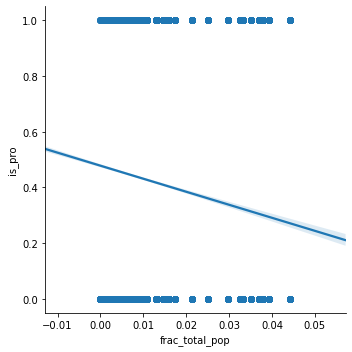

In [142]:
sns.lmplot(x='frac_total_pop',y='is_pro',data=df2)

In [146]:
df3 = df2.groupby(by=['year','country']).agg('mean').reset_index()

In [151]:
df3['log_frac_total_pop'] = np.log(df3['frac_total_pop']+1)

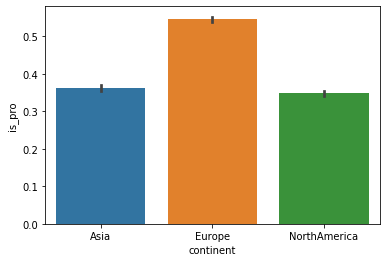

In [165]:
sns.barplot(x='continent',y='is_pro',data=df2)

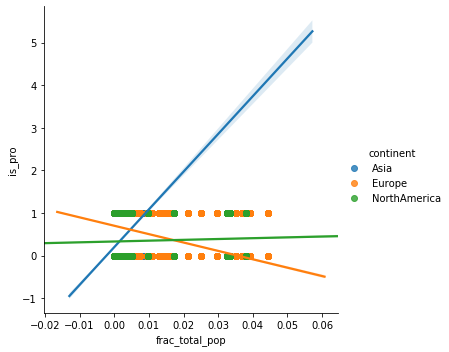

In [166]:
sns.lmplot(x='frac_total_pop',y='is_pro',data=df2,hue='continent')

In [3]:
df = pd.read_csv('datasheet.csv')

In [5]:
df_big = pd.read_csv('ipums_usa.csv.gz',compression='gzip')

In [20]:
df_big

,YEAR,FAMSIZE,BPL,BPLD,ANCESTR1,ANCESTR1D,CITIZEN,EDUC,EDUCD,LIT,LABFORCE,INCTOT,SEI,PRESGL
0,1880,8,1,100,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,18,28.4
1,1880,8,1,100,NaN,NaN,NaN,NaN,NaN,4.0,1,NaN,0,0.0
2,1880,8,1,100,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,0,0.0
3,1880,8,1,100,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,0,0.0
4,1880,8,1,100,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78338849,2019,2,56,5600,22.0,220.0,0.0,6.0,64.0,NaN,2,117000.0,44,35.5
78338850,2019,2,56,5600,22.0,220.0,0.0,5.0,50.0,NaN,2,14000.0,8,17.5
78338851,2019,1,56,5600,89.0,890.0,0.0,6.0,63.0,NaN,1,18500.0,0,0.0
78338852,2019,2,16,1600,22.0,220.0,0.0,11.0,114.0,NaN,1,49900.0,0,0.0


In [19]:
country_codes = {}
country_codes['Russia'] = 46500
country_codes['Ireland'] = 41400
country_codes['Italy'] = 43400
country_codes['Japan'] = 50100
country_codes['Cuba'] = 25000
country_codes['Poland'] = 45500
country_codes['Hungary'] = 45400
country_codes['Greece'] = 43300
country_codes['Vietnam'] = 51800
country_codes['Haiti'] = 26020
country_codes['China'] = 50000
country_codes['Philippines'] = 51500
country_codes['Mexico'] = 20000
country_codes['Germany'] = 45300

In [39]:
country_codes_inv = {v:k for (k,v) in country_codes.items()}

In [24]:
df_foreign = df_big[df_big['BPLD'].isin(country_codes.values())]

In [25]:
df_foreign

,YEAR,FAMSIZE,BPL,BPLD,ANCESTR1,ANCESTR1D,CITIZEN,EDUC,EDUCD,LIT,LABFORCE,INCTOT,SEI,PRESGL
3349,1880,2,414,41400,NaN,NaN,NaN,NaN,NaN,4.0,1,NaN,0,0.0
3359,1880,1,414,41400,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,8,17.5
3360,1880,1,414,41400,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,8,17.5
3361,1880,1,414,41400,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,8,17.5
3362,1880,1,414,41400,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN,8,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78338740,2019,6,200,20000,210.0,2102.0,3.0,4.0,40.0,NaN,1,0.0,0,0.0
78338741,2019,6,200,20000,210.0,2102.0,3.0,2.0,26.0,NaN,0,0.0,0,0.0
78338742,2019,6,200,20000,210.0,2102.0,3.0,2.0,25.0,NaN,0,9999999.0,0,0.0
78338763,2019,7,515,51500,720.0,7200.0,2.0,6.0,64.0,NaN,2,35000.0,68,50.3


In [27]:
df_small = df_foreign.groupby(['YEAR','BPLD']).agg('mean').reset_index()

In [29]:
df_small['decade'] = df_small['YEAR']

In [33]:
df_small['decade'] = [2020 if x == 2019 else x for x in df_small['decade']]

In [34]:
df_small

,YEAR,BPLD,FAMSIZE,BPL,ANCESTR1,ANCESTR1D,CITIZEN,EDUC,EDUCD,LIT,LABFORCE,INCTOT,SEI,PRESGL,decade
0,1880,20000,4.344507,200.0,NaN,NaN,NaN,NaN,NaN,2.035659,1.294334,NaN,6.109703,12.211280,1880
1,1880,25000,4.371895,250.0,NaN,NaN,NaN,NaN,NaN,3.556423,1.317246,NaN,15.559972,17.388148,1880
2,1880,26020,4.625000,260.0,NaN,NaN,NaN,NaN,NaN,3.375000,1.541667,NaN,17.583333,22.687500,1880
3,1880,41400,4.319696,414.0,NaN,NaN,NaN,NaN,NaN,3.475882,1.533299,NaN,10.381716,16.146852,1880
4,1880,43300,2.500000,433.0,NaN,NaN,NaN,NaN,NaN,3.475000,1.775000,NaN,17.262500,27.130000,1880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2019,46500,2.745933,465.0,335.426543,3354.359670,2.181255,8.313710,85.747224,NaN,1.541183,549544.832688,36.743868,32.239633,2020
183,2019,50000,3.014204,500.0,748.207128,7482.082302,2.439831,7.337923,76.084829,NaN,1.502832,544041.860186,34.104130,29.767693,2020
184,2019,50100,2.710053,501.0,667.175968,6672.429195,1.995819,7.546446,77.800036,NaN,1.434285,973978.515906,33.716052,28.841920,2020
185,2019,51500,3.486330,515.0,749.716010,7497.173560,2.175185,7.900989,80.988627,NaN,1.591979,379643.988070,31.679293,30.971513,2020


In [41]:
df_small['country'] = [country_codes_inv[x] for x in df_small['BPLD']]

In [45]:
df_ses = df_small[['decade','country','FAMSIZE','EDUC','LIT','SEI','PRESGL']]

In [46]:
df_ses

,decade,country,FAMSIZE,EDUC,LIT,SEI,PRESGL
0,1880,Mexico,4.344507,NaN,2.035659,6.109703,12.211280
1,1880,Cuba,4.371895,NaN,3.556423,15.559972,17.388148
2,1880,Haiti,4.625000,NaN,3.375000,17.583333,22.687500
3,1880,Ireland,4.319696,NaN,3.475882,10.381716,16.146852
4,1880,Greece,2.500000,NaN,3.475000,17.262500,27.130000
...,...,...,...,...,...,...,...
182,2020,Russia,2.745933,8.313710,NaN,36.743868,32.239633
183,2020,China,3.014204,7.337923,NaN,34.104130,29.767693
184,2020,Japan,2.710053,7.546446,NaN,33.716052,28.841920
185,2020,Philippines,3.486330,7.900989,NaN,31.679293,30.971513


In [52]:
df_for_regression = df.merge(df_ses,on=['country','decade'],how='left').drop(columns=['Unnamed: 0'])

In [54]:
df_for_regression.to_csv('datasheet_05-02-2022.csv')

In [55]:
df_for_regression

,congress,year,country,is_pro,is_neutral,is_anti,decade,frac_total_pop,frac_foreign_pop,continent,FAMSIZE,EDUC,LIT,SEI,PRESGL
0,47,1882,Japan,1,0,0,1880,0.000008,0.000060,Asia,2.795918,NaN,2.795918,9.000000,12.079592
1,47,1882,Japan,1,0,0,1880,0.000008,0.000060,Asia,2.795918,NaN,2.795918,9.000000,12.079592
2,48,1884,Japan,1,0,0,1880,0.000008,0.000060,Asia,2.795918,NaN,2.795918,9.000000,12.079592
3,46,1880,Japan,0,0,1,1880,0.000008,0.000060,Asia,2.795918,NaN,2.795918,9.000000,12.079592
4,47,1882,Japan,0,0,1,1880,0.000008,0.000060,Asia,2.795918,NaN,2.795918,9.000000,12.079592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55490,116,2020,Italy,1,0,0,2020,0.000959,0.007008,Europe,2.453418,6.354635,NaN,26.125702,22.776264
55491,116,2020,Italy,0,0,1,2020,0.000959,0.007008,Europe,2.453418,6.354635,NaN,26.125702,22.776264
55492,116,2020,Italy,0,1,0,2020,0.000959,0.007008,Europe,2.453418,6.354635,NaN,26.125702,22.776264
55493,116,2020,Italy,0,1,0,2020,0.000959,0.007008,Europe,2.453418,6.354635,NaN,26.125702,22.776264


In [78]:
def format_coefs(df_coef):
    df_new = df_coef.reset_index()
    df_new.columns = ['Term','Estimate','Std. Error','z','p']
    df_new['ci'] = df_new['Std. Error'] * 1.96
    df_new['err_low'] = df_new['Estimate'] - df_new['ci']
    df_new['err_high'] = df_new['Estimate'] + df_new['ci']
    return df_new

In [79]:
coef_main = format_coefs(pd.read_csv('coef_main.csv'))
coef_lit = format_coefs(pd.read_csv('coef_lit.csv'))
coef_educ = format_coefs(pd.read_csv('coef_educ.csv'))
eff_interaction = pd.read_csv('year_continent_interaction.csv')

In [80]:
coef_main

,Term,Estimate,Std. Error,z,p,ci,err_low,err_high
0,(Intercept),0.270180,0.017226,15.684768,1.922648e-55,0.033762,0.236418,0.303943
1,year,1.212834,0.024343,49.822069,0.000000e+00,0.047713,1.165121,1.260547
2,continentAsia,-0.858270,0.032689,-26.255320,6.214734e-152,0.064071,-0.922341,-0.794199
3,continentNorthAmerica,-1.273552,0.036648,-34.750876,1.344416e-264,0.071830,-1.345382,-1.201722
4,frac_foreign_pop,-0.248104,0.016782,-14.783699,1.866284e-49,0.032893,-0.280998,-0.215211
5,famsize,-0.297965,0.022192,-13.426845,4.209663e-41,0.043496,-0.341460,-0.254469
6,sei,-0.387933,0.023385,-16.588656,8.418268e-62,0.045835,-0.433768,-0.342097
7,year:continentAsia,0.887829,0.045338,19.582642,2.174462e-85,0.088862,0.798967,0.976691
8,year:continentNorthAmerica,0.075175,0.042835,1.754991,7.926091e-02,0.083957,-0.008782,0.159132


In [ ]:
coef_main['Model'] = 'All Years'
coef_educ['Model'] = '1940-2020'
coef_lit['Model'] = '1880-1930'

In [93]:
coef_all = pd.concat([coef_main,coef_educ,coef_lit])

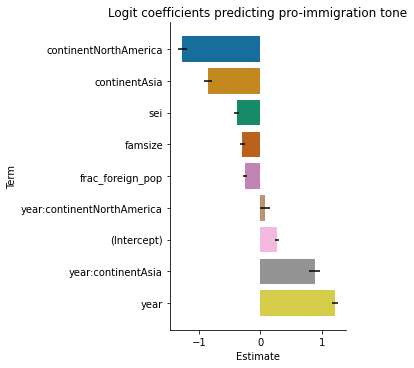

In [116]:
coef_main = coef_main.sort_values(by='Estimate')
sns.catplot(y='Term',x='Estimate',data=coef_main,kind='bar',palette='colorblind')
plt.errorbar(y=coef_main['Term'],x=coef_main['Estimate'],
            xerr=coef_main['ci'], fmt='none', c= 'black')
plt.title('Logit coefficients predicting pro-immigration tone')
plt.savefig('regression_coefficients_pro_tone.pdf',bbox_inches='tight')

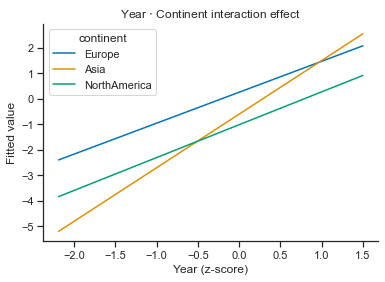

In [129]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params,palette='colorblind')
sns.lineplot(x='year',y='eff.fit',hue='continent',data=eff_interaction)
plt.title('Year $\cdot$ Continent interaction effect')
plt.xlabel('Year (z-score)')
plt.ylabel('Fitted value')
plt.savefig('regression_interaction_pro_tone.pdf',bbox_inches='tight')